### This notebook makes all the contour plots for the various unfoldings.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [2]:
from modules.truth import truth # just to look at the list of scenarios to plot
from modules.plotting import density_cut,contours,scatter,zero_fix # functions to make contour plots
from modules.snowglobes_curves import snowglobes_curves # function to plot snowglobes curves
from modules.other_sn_models import other_sn_models # function to plot other models from snowglobes

In [3]:
inputfile = 'input.txt'
truth = truth(inputfile)

In [4]:
# For reference, here are the different scenarios I'm plotting
for config in truth:
    print(config,truth[config])

halo1_5kpc [[72, 48], [40, 12], [16, 0]]
halo1_10kpc [[18, 12], [10, 3], [4, 0]]
halo2_10kpc [[227, 151], [127, 38], [51, 0]]


In [5]:
# where the unfolded data lives
unfolded_location = './unfolded_data/'

## Plot style settings

In [17]:
figsize = (8,6)
plt.rc('font', family='sans-serif')
plt.rc('axes', labelsize='xx-large')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes',titlesize='xx-large')
truth_size = 200
exp_size = 30
dist_size = 20
#print(plt.rcParams.keys())

# PLOTS

## Matrix inversion

##### HALO1, 5kpc

In [18]:
# Data for HALO 1, 5kpc, 72v48 40vs12 16v0
h1_5kpc_72v48_1n, h1_5kpc_72v48_2n = np.load(unfolded_location+'halo1_5kpc_72v48_unfolded_matrix.npy')
h1_5kpc_40v12_1n, h1_5kpc_40v12_2n = np.load(unfolded_location+'halo1_5kpc_40v12_unfolded_matrix.npy')
h1_5kpc_16v0_1n,  h1_5kpc_16v0_2n  = np.load(unfolded_location+'halo1_5kpc_16v0_unfolded_matrix.npy')

In [19]:
# HALO 1, 5kpc, 72v48
xmin = -100; xmax = 250; ymin = -15; ymax = 150
xres = 50j; yres = 50j
xM1_1,yM1_1,zM1_1,cutM1_1 = density_cut(h1_5kpc_72v48_1n,h1_5kpc_72v48_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xM1_1,yM1_1,zM1_1,cutM1_1,ax)
#scatter(h1_5kpc_72v48_1n,h1_5kpc_72v48_2n,ax)

In [20]:
# HALO 1, 5kpc, 40vs12
xmin = -50; xmax = 125; ymin = -15; ymax = 80
xres = 10; yres = 10
xM1_2,yM1_2,zM1_2,cutM1_2 = density_cut(h1_5kpc_40v12_1n,h1_5kpc_40v12_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xM1_2,yM1_2,zM1_2,cutM1_2,ax)
#scatter(h1_5kpc_40v12_1n,h1_5kpc_40v12_2n,ax)

In [21]:
# HALO 1, 5kpc, 16vs0
xmin = 0; xmax = 40; ymin = -20; ymax = 20
xres = 14j; yres = 12j
oneN_,twoN_ = zero_fix(h1_5kpc_16v0_1n,h1_5kpc_16v0_2n)
xM1_3,yM1_3,zM1_3,cutM1_3 = density_cut(oneN_,twoN_,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xM1_3,yM1_3,zM1_3,cutM1_3,ax)
#scatter(h1_5kpc_16v0_1n,h1_5kpc_16v0_2n,ax)

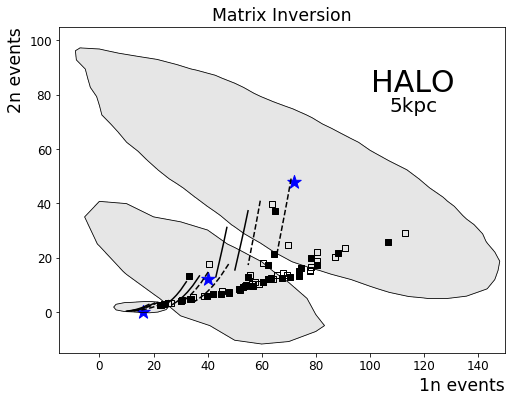

In [22]:
# Figure for HALO 1, 5kpc, 72v48 40vs12 16v0
figM1,axM1 = plt.subplots(1,1,figsize=figsize)

contours(xM1_1,yM1_1,zM1_1,cutM1_1,axM1)
contours(xM1_2,yM1_2,zM1_2,cutM1_2,axM1)
contours(xM1_3,yM1_3,zM1_3,cutM1_3,axM1)

other_sn_models(axM1,1,5,False)
snowglobes_curves(axM1,1,5,False)

# Truth values
Truth = [[72,40,16],[48,12,0]]
axM1.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axM1.set_title('Matrix Inversion')
axM1.text(0.7,0.8,'HALO',fontsize=exp_size,transform=axM1.transAxes)
axM1.text(0.74,0.74,'5kpc',fontsize=dist_size,transform=axM1.transAxes)


axM1.set_xlim(-15,150)
axM1.set_ylim(-15,105)

pylab.savefig('./figures/matrix_unfolding_halo1_5kpc.png')

plt.show()

##### HALO1, 10kpc

In [55]:
# Data for HALO 1, 10kpc, 18v12 10vs3 4v0
h1_10kpc_18v12_1n, h1_10kpc_18v12_2n = np.load(unfolded_location+'halo1_10kpc_18v12_unfolded_matrix.npy')
h1_10kpc_10v3_1n,  h1_10kpc_10v3_2n  = np.load(unfolded_location+'halo1_10kpc_10v3_unfolded_matrix.npy')
h1_10kpc_4v0_1n,   h1_10kpc_4v0_2n   = np.load(unfolded_location+'halo1_10kpc_4v0_unfolded_matrix.npy')

In [56]:
# HALO 1, 10kpc, 18v12
xmin = -75; xmax = 100; ymin = -15; ymax = 80
xres = 17j; yres = 11j
xM2_1,yM2_1,zM2_1,cutM2_1 = density_cut(h1_10kpc_18v12_1n,h1_10kpc_18v12_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xM2_1,yM2_1,zM2_1,cutM2_1,ax)
#scatter(h1_10kpc_18v12_1n,h1_10kpc_18v12_2n,ax)

In [57]:
# HALO 1, 10kpc, 10vs3
xmin = -40; xmax = 60; ymin = -15; ymax = 50
xres = 40j; yres = 40j
oneN_, twoN_ = density_cut(h1_10kpc_10v3_1n,h1_10kpc_10v3_2n,xmin,xmax,ymin,ymax,xres,yres,trim=True)
xres = 15j; yres = 12j
xM2_2,yM2_2,zM2_2,cutM2_2 = density_cut(oneN_, twoN_,xmin,xmax,ymin,ymax,xres,yres,cut=0.22)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xM2_2,yM2_2,zM2_2,cutM2_2,ax)
#scatter(h1_10kpc_10v3_1n,h1_10kpc_10v3_2n,ax)

In [58]:
# HALO 1, 10kpc, 4vs0
xmin = -5; xmax = 15; ymin = -5; ymax = 8
xres = 8j; yres = 13j
oneN_,twoN_ = zero_fix(h1_10kpc_4v0_1n,h1_10kpc_4v0_2n)
xM2_3,yM2_3,zM2_3,cutM2_3 = density_cut(oneN_,twoN_,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xM2_3,yM2_3,zM2_3,cutM2_3,ax)
#scatter(h1_10kpc_4v0_1n,h1_10kpc_4v0_2n,ax)

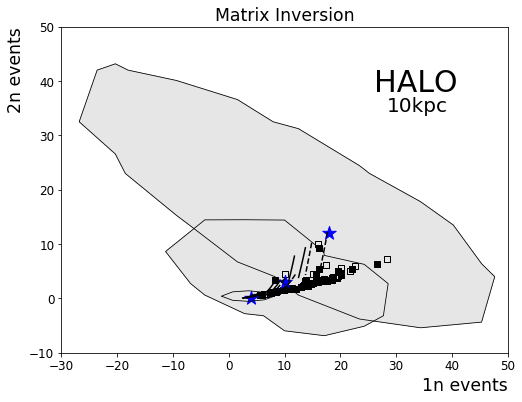

In [59]:
# Figure for HALO 1, 10kpc, 18v12 10vs3 4v0
figM2,axM2 = plt.subplots(1,1,figsize=figsize)

contours(xM2_1,yM2_1,zM2_1,cutM2_1,axM2)
contours(xM2_2,yM2_2,zM2_2,cutM2_2,axM2)
contours(xM2_3,yM2_3,zM2_3,cutM2_3,axM2)

other_sn_models(axM2,1,10,False)
snowglobes_curves(axM2,1,10,False)

# Truth values
Truth = [[18,10,4],[12,3,0]]
axM2.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axM2.set_title('Matrix Inversion')
axM2.text(0.7,0.8,'HALO',fontsize=exp_size,transform=axM2.transAxes)
axM2.text(0.73,0.74,'10kpc',fontsize=dist_size,transform=axM2.transAxes)


axM2.set_xlim(-30,50)
axM2.set_ylim(-10,50)

pylab.savefig('./figures/matrix_unfolding_halo1_10kpc.png')

plt.show()

##### HALO2, 10kpc

In [24]:
# Data for HALO 2, 10kpc, 227v151 127vs38 51v0
h2_10kpc_227v151_1n, h2_10kpc_227v151_2n = np.load(unfolded_location+'halo2_10kpc_227v151_unfolded_matrix.npy')
h2_10kpc_127v38_1n,  h2_10kpc_127v38_2n  = np.load(unfolded_location+'halo2_10kpc_127v38_unfolded_matrix.npy')
h2_10kpc_51v0_1n,    h2_10kpc_51v0_2n    = np.load(unfolded_location+'halo2_10kpc_51v0_unfolded_matrix.npy')

In [25]:
# HALO 2, 10kpc, 227v151
xmin = -50; xmax = 500; ymin = 0; ymax = 330
xres = 50j; yres = 50j
xM3_1,yM3_1,zM3_1,cutM3_1 = density_cut(h2_10kpc_227v151_1n,h2_10kpc_227v151_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xM3_1,yM3_1,zM3_1,cutM3_1,ax)
#scatter(h2_10kpc_227v151_1n,h2_10kpc_227v151_2n,ax)

In [26]:
# HALO 2, 10kpc, 127vs38
xmin = -50; xmax = 300; ymin = -20; ymax = 150
xres = 50j; yres = 40j
xM3_2,yM3_2,zM3_2,cutM3_2 = density_cut(h2_10kpc_127v38_1n,h2_10kpc_127v38_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xM3_2,yM3_2,zM3_2,cutM3_2,ax)
#scatter(h2_10kpc_127v38_1n,h2_10kpc_127v38_2n,ax)

In [27]:
# HALO 2, 10kpc, 51vs0
xmin = -50; xmax = 150; ymin = -50; ymax = 80
xres = 40j; yres = 30j
oneN_,twoN_ = zero_fix(h2_10kpc_51v0_1n,h2_10kpc_51v0_2n)
xM3_3,yM3_3,zM3_3,cutM3_3 = density_cut(oneN_,twoN_,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xM3_3,yM3_3,zM3_3,cutM3_3,ax)
#scatter(h2_10kpc_51v0_1n,h2_10kpc_51v0_2n,ax)

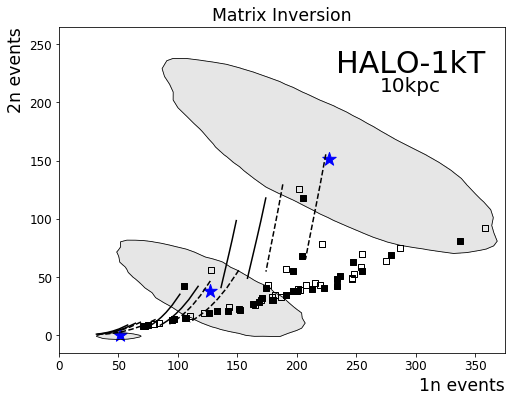

In [28]:
# Figure for HALO 2, 10kpc, 227v151 127vs38 51v0
figM3,axM3 = plt.subplots(1,1,figsize=figsize)

contours(xM3_1,yM3_1,zM3_1,cutM3_1,axM3)
contours(xM3_2,yM3_2,zM3_2,cutM3_2,axM3)
contours(xM3_3,yM3_3,zM3_3,cutM3_3,axM3)

other_sn_models(axM3,2,10,False)
snowglobes_curves(axM3,2,10,False)

# Truth values
Truth = [[227,127,51],[151,38,0]]
axM3.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axM3.set_title('Matrix Inversion')
axM3.text(0.62,0.86,'HALO-1kT',fontsize=exp_size,transform=axM3.transAxes)
axM3.text(0.72,0.80,'10kpc',fontsize=dist_size,transform=axM3.transAxes)


axM3.set_xlim(0,375)
axM3.set_ylim(-15,265)

pylab.savefig('./figures/matrix_unfolding_halo2_10kpc.png')

plt.show()

## Bayesian

#### Positive Plane Prior

##### HALO1, 5kpc

In [155]:
# Data for HALO 1, 5kpc, 72v48 40vs12 16v0
h1_5kpc_72v48_1n, h1_5kpc_72v48_2n = np.load(unfolded_location+'halo1_5kpc_72v48_unfolded_bayesian_PP.npy')
h1_5kpc_40v12_1n, h1_5kpc_40v12_2n = np.load(unfolded_location+'halo1_5kpc_40v12_unfolded_bayesian_PP.npy')
h1_5kpc_16v0_1n,  h1_5kpc_16v0_2n  = np.load(unfolded_location+'halo1_5kpc_16v0_unfolded_bayesian_PP.npy')

In [148]:
# HALO 1, 5kpc, 72v48
xmin = -100; xmax = 250; ymin = -15; ymax = 150
xres = 80j; yres = 80j
xBpp1_1,yBpp1_1,zBpp1_1,cutBpp1_1 = density_cut(h1_5kpc_72v48_1n,h1_5kpc_72v48_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBpp1_1,yBpp1_1,zBpp1_1,cutBpp1_1,ax)
#scatter(h1_5kpc_72v48_1n,h1_5kpc_72v48_2n,ax)

In [149]:
# HALO 1, 5kpc, 40vs12
xmin = -50; xmax = 125; ymin = -15; ymax = 80
xres = 20j; yres = 20j
xBpp1_2,yBpp1_2,zBpp1_2,cutBpp1_2 = density_cut(h1_5kpc_40v12_1n,h1_5kpc_40v12_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBpp1_2,yBpp1_2,zBpp1_2,cutBpp1_2,ax)
#scatter(h1_5kpc_40v12_1n,h1_5kpc_40v12_2n,ax)

In [243]:
# HALO 1, 5kpc, 16vs0
xmin = -5; xmax = 40; ymin = -20; ymax = 20
xres = 40j; yres = 40j
oneN_, twoN_ = density_cut(h1_10kpc_10v3_1n,h1_10kpc_10v3_2n,xmin,xmax,ymin,ymax,xres,yres,trim=True)
xres = 10j; yres = 10j
xBpp1_3,yBpp1_3,zBpp1_3,cutBpp1_3 = density_cut(oneN_,twoN_,xmin,xmax,ymin,ymax,xres,yres,cut=0.15)
xBpp1_3 = [i+2 for i in xBpp1_3]
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBpp1_3,yBpp1_3,zBpp1_3,cutBpp1_3,ax)
#scatter(h1_5kpc_16v0_1n,h1_5kpc_16v0_2n,ax)
#scatter(oneN_,twoN_,ax)

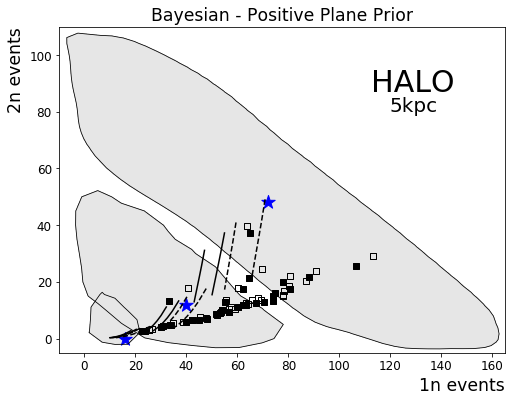

In [251]:
# Figure for HALO 1, 5kpc, 72v48 40vs12 16v0
figBpp1,axBpp1 = plt.subplots(1,1,figsize=figsize)

contours(xBpp1_1,yBpp1_1,zBpp1_1,cutBpp1_1,axBpp1)
contours(xBpp1_2,yBpp1_2,zBpp1_2,cutBpp1_2,axBpp1)
contours(xBpp1_3,yBpp1_3,zBpp1_3,cutBpp1_3,axBpp1)

other_sn_models(axBpp1,1,5,False)
snowglobes_curves(axBpp1,1,5,False)

# Truth values
Truth = [[72,40,16],[48,12,0]]
axBpp1.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axBpp1.set_title('Bayesian - Positive Plane Prior')
axBpp1.text(0.7,0.8,'HALO',fontsize=exp_size,transform=axBpp1.transAxes)
axBpp1.text(0.74,0.74,'5kpc',fontsize=dist_size,transform=axBpp1.transAxes)


axBpp1.set_xlim(-10,165)
axBpp1.set_ylim(-5,110)

pylab.savefig('./figures/bayesian_positiveplane_unfolding_halo1_5kpc.png')

plt.show()

##### HALO1, 10kpc

In [244]:
# Data for HALO 1, 10kpc, 18v12 10vs3 4v0
h1_10kpc_18v12_1n, h1_10kpc_18v12_2n = np.load(unfolded_location+'halo1_10kpc_18v12_unfolded_bayesian_PP.npy')
h1_10kpc_10v3_1n,  h1_10kpc_10v3_2n  = np.load(unfolded_location+'halo1_10kpc_10v3_unfolded_bayesian_PP.npy')
h1_10kpc_4v0_1n,   h1_10kpc_4v0_2n   = np.load(unfolded_location+'halo1_10kpc_4v0_unfolded_bayesian_PP.npy')

In [245]:
# HALO 1, 10kpc, 18v12
xmin = -10; xmax = 60; ymin = -15; ymax = 60
xres = 12j; yres = 8j
oneN_, twoN_ = density_cut(h1_10kpc_18v12_1n,h1_10kpc_18v12_2n,xmin,xmax,ymin,ymax,xres,yres,trim=True,cut=0.05)
oneN__ = [i+5 for i in oneN_]
xBpp2_1,yBpp2_1,zBpp2_1,cutBpp2_1 = density_cut(oneN__,twoN_,xmin,xmax,ymin,ymax,xres,yres,cut=0.2)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBpp2_1,yBpp2_1,zBpp2_1,cutBpp2_1,ax)
#scatter(h1_10kpc_18v12_1n,h1_10kpc_18v12_2n,ax)
#scatter(oneN_,twoN_,ax)

In [246]:
# HALO 1, 10kpc, 10vs3
xmin = -5; xmax = 40; ymin = -5; ymax = 15
xres = 40j; yres = 40j
oneN_, twoN_ = density_cut(h1_10kpc_10v3_1n,h1_10kpc_10v3_2n,xmin,xmax,ymin,ymax,xres,yres,trim=True)
xres = 8j; yres = 6j
oneN__ = [i+5 for i in oneN_]
xBpp2_2,yBpp2_2,zBpp2_2,cutBpp2_2 = density_cut(oneN__, twoN_,xmin,xmax,ymin,ymax,xres,yres,cut=0.1)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBpp2_2,yBpp2_2,zBpp2_2,cutBpp2_2,ax)
#scatter(h1_10kpc_10v3_1n,h1_10kpc_10v3_2n,ax)
#scatter(oneN_,twoN_,ax)

In [247]:
# HALO 1, 10kpc, 4vs0
xmin = -5; xmax = 25; ymin = -5; ymax = 20
xres = 30j; yres = 30j
oneN_, twoN_ = density_cut(h1_10kpc_4v0_1n,h1_10kpc_4v0_2n,xmin,xmax,ymin,ymax,xres,yres,trim=True,cut=0.1)
xres = 7j; yres = 8j
xBpp2_3,yBpp2_3,zBpp2_3,cutBpp2_3 = density_cut(oneN_, twoN_,xmin,xmax,ymin,ymax,xres,yres,cut=0.55)
xBpp2_3 = [i-1 for i in xBpp2_3]
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBpp2_3,yBpp2_3,zBpp2_3,cutBpp2_3,ax)
#scatter(h1_10kpc_4v0_1n,h1_10kpc_4v0_2n,ax)
#scatter(oneN_,twoN_,ax)

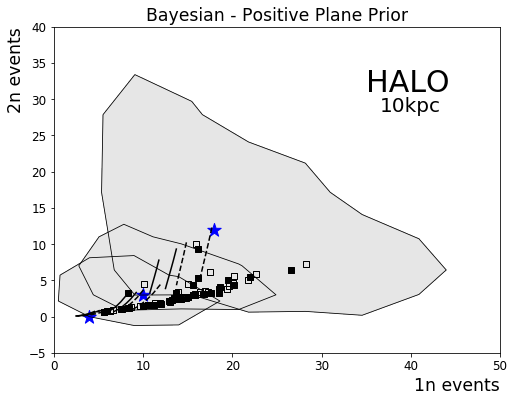

In [250]:
# Figure for HALO 1, 10kpc, 18v12 10vs3 4v0
figBpp2,axBpp2 = plt.subplots(1,1,figsize=figsize)

contours(xBpp2_1,yBpp2_1,zBpp2_1,cutBpp2_1,axBpp2)
contours(xBpp2_2,yBpp2_2,zBpp2_2,cutBpp2_2,axBpp2)
contours(xBpp2_3,yBpp2_3,zBpp2_3,cutBpp2_3,axBpp2)

other_sn_models(axBpp2,1,10,False)
snowglobes_curves(axBpp2,1,10,False)

# Truth values
Truth = [[18,10,4],[12,3,0]]
axBpp2.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axBpp2.set_title('Bayesian - Positive Plane Prior')
axBpp2.text(0.7,0.8,'HALO',fontsize=exp_size,transform=axBpp2.transAxes)
axBpp2.text(0.73,0.74,'10kpc',fontsize=dist_size,transform=axBpp2.transAxes)


axBpp2.set_xlim(0,50)
axBpp2.set_ylim(-5,40)

pylab.savefig('./figures/bayesian_positiveplane_unfolding_halo1_10kpc.png')

plt.show()

##### HALO2, 10kpc

In [296]:
# Data for HALO 2, 10kpc, 227v151 127vs38 51v0
h2_10kpc_227v151_1n, h2_10kpc_227v151_2n = np.load(unfolded_location+'halo2_10kpc_227v151_unfolded_bayesian_PP.npy')
h2_10kpc_127v38_1n,  h2_10kpc_127v38_2n  = np.load(unfolded_location+'halo2_10kpc_127v38_unfolded_bayesian_PP.npy')
h2_10kpc_51v0_1n,    h2_10kpc_51v0_2n    = np.load(unfolded_location+'halo2_10kpc_51v0_unfolded_bayesian_PP.npy')

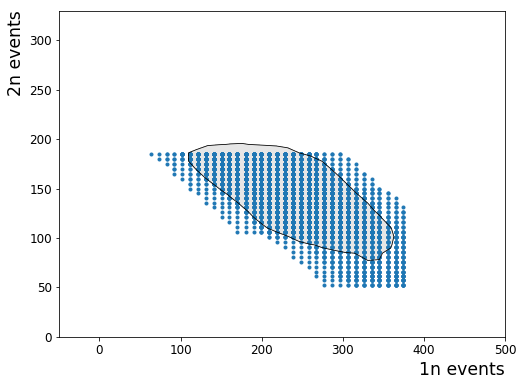

In [297]:
# HALO 2, 10kpc, 227v151
xmin = -50; xmax = 500; ymin = 0; ymax = 330
xres = 40j; yres = 40j
xBpp3_1,yBpp3_1,zBpp3_1,cutBpp3_1 = density_cut(h2_10kpc_227v151_1n,h2_10kpc_227v151_2n,xmin,xmax,ymin,ymax,xres,yres,cut=0.1)
fig,ax = plt.subplots(1,1,figsize=figsize)
contours(xBpp3_1,yBpp3_1,zBpp3_1,cutBpp3_1,ax)
scatter(h2_10kpc_227v151_1n,h2_10kpc_227v151_2n,ax)

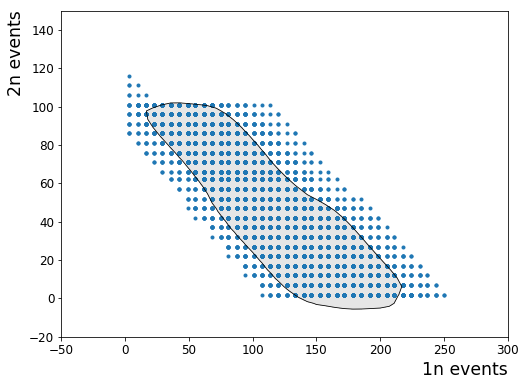

In [270]:
# HALO 2, 10kpc, 127vs38
xmin = -50; xmax = 300; ymin = -20; ymax = 150
xres = 50j; yres = 40j
xBpp3_2,yBpp3_2,zBpp3_2,cutBpp3_2 = density_cut(h2_10kpc_127v38_1n,h2_10kpc_127v38_2n,xmin,xmax,ymin,ymax,xres,yres)
fig,ax = plt.subplots(1,1,figsize=figsize)
contours(xBpp3_2,yBpp3_2,zBpp3_2,cutBpp3_2,ax)
scatter(h2_10kpc_127v38_1n,h2_10kpc_127v38_2n,ax)

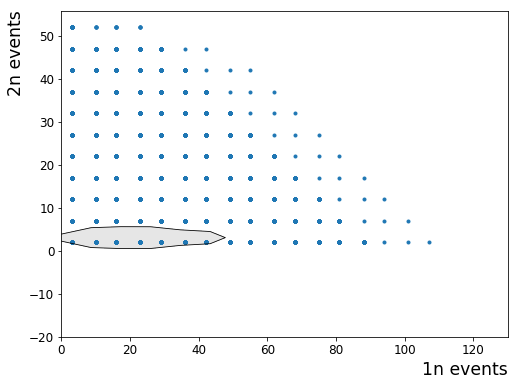

In [271]:
# HALO 2, 10kpc, 51vs0
xmin = 0; xmax = 130; ymin = -20; ymax = 40
xres = 16j; yres = 14j
oneN_,twoN_ = zero_fix(h2_10kpc_51v0_1n,h2_10kpc_51v0_2n)
twoN_ = [i+1 for i in twoN_]
xBpp3_3,yBpp3_3,zBpp3_3,cutBpp3_3 = density_cut(oneN_,twoN_,xmin,xmax,ymin,ymax,xres,yres)
fig,ax = plt.subplots(1,1,figsize=figsize)
contours(xBpp3_3,yBpp3_3,zBpp3_3,cutBpp3_3,ax)
scatter(h2_10kpc_51v0_1n,h2_10kpc_51v0_2n,ax)

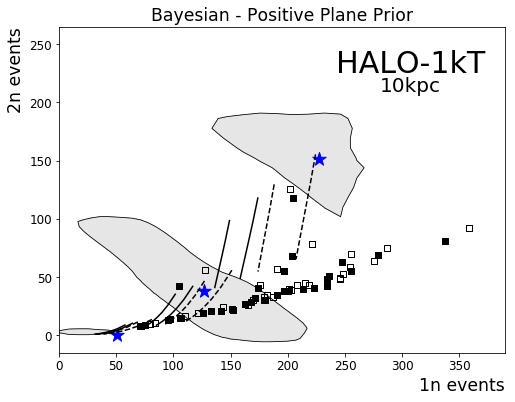

In [273]:
# Figure for HALO 2, 10kpc, 227v151 127vs38 51v0
figBpp3,axBpp3 = plt.subplots(1,1,figsize=figsize)

contours(xBpp3_1,yBpp3_1,zBpp3_1,cutBpp3_1,axBpp3)
contours(xBpp3_2,yBpp3_2,zBpp3_2,cutBpp3_2,axBpp3)
contours(xBpp3_3,yBpp3_3,zBpp3_3,cutBpp3_3,axBpp3)

other_sn_models(axBpp3,2,10,False)
snowglobes_curves(axBpp3,2,10,False)

# Truth values
Truth = [[227,127,51],[151,38,0]]
axBpp3.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axBpp3.set_title('Bayesian - Positive Plane Prior')
axBpp3.text(0.62,0.86,'HALO-1kT',fontsize=exp_size,transform=axBpp3.transAxes)
axBpp3.text(0.72,0.80,'10kpc',fontsize=dist_size,transform=axBpp3.transAxes)


axBpp3.set_xlim(0,390)
axBpp3.set_ylim(-15,265)

pylab.savefig('./figures/bayesian_positiveplane_unfolding_halo2_10kpc.png')

plt.show()

#### Distance Known Prior

##### HALO1, 5kpc

In [275]:
# Data for HALO 1, 5kpc, 72v48 40vs12 16v0
h1_5kpc_72v48_1n, h1_5kpc_72v48_2n = np.load(unfolded_location+'halo1_5kpc_72v48_unfolded_bayesian_distKnown.npy')
h1_5kpc_40v12_1n, h1_5kpc_40v12_2n = np.load(unfolded_location+'halo1_5kpc_40v12_unfolded_bayesian_distKnown.npy')
h1_5kpc_16v0_1n,  h1_5kpc_16v0_2n  = np.load(unfolded_location+'halo1_5kpc_16v0_unfolded_bayesian_distKnown.npy')

In [276]:
# HALO 1, 5kpc, 72v48
xmin = -100; xmax = 250; ymin = -15; ymax = 150
xres = 50j; yres = 50j
xBdk1_1,yBdk1_1,zBdk1_1,cutBdk1_1 = density_cut(h1_5kpc_72v48_1n,h1_5kpc_72v48_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBdk1_1,yBdk1_1,zBdk1_1,cutBdk1_1,ax)
#scatter(h1_5kpc_72v48_1n,h1_5kpc_72v48_2n,ax)

In [277]:
# HALO 1, 5kpc, 40vs12
xmin = -50; xmax = 125; ymin = -15; ymax = 80
xres = 60j; yres = 60j
xBdk1_2,yBdk1_2,zBdk1_2,cutBdk1_2 = density_cut(h1_5kpc_40v12_1n,h1_5kpc_40v12_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBdk1_2,yBdk1_2,zBdk1_2,cutBdk1_2,ax)
#scatter(h1_5kpc_40v12_1n,h1_5kpc_40v12_2n,ax)

In [278]:
# HALO 1, 5kpc, 16vs0
xmin = 0; xmax = 40; ymin = -20; ymax = 20
xres = 12j; yres = 12j
oneN_,twoN_ = zero_fix(h1_5kpc_16v0_1n,h1_5kpc_16v0_2n)
xBdk1_3,yBdk1_3,zBdk1_3,cutBdk1_3 = density_cut(oneN_,twoN_,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBdk1_3,yBdk1_3,zBdk1_3,cutBdk1_3,ax)
#scatter(h1_5kpc_16v0_1n,h1_5kpc_16v0_2n,ax)

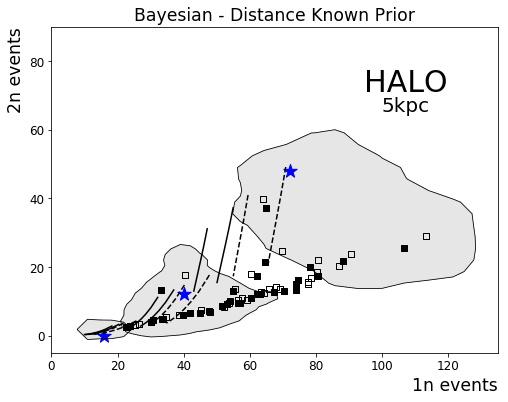

In [279]:
# Figure for HALO 1, 5kpc, 72v48 40vs12 16v0
figBdk1,axBdk1 = plt.subplots(1,1,figsize=figsize)

contours(xBdk1_1,yBdk1_1,zBdk1_1,cutBdk1_1,axBdk1)
contours(xBdk1_2,yBdk1_2,zBdk1_2,cutBdk1_2,axBdk1)
contours(xBdk1_3,yBdk1_3,zBdk1_3,cutBdk1_3,axBdk1)

other_sn_models(axBdk1,1,5,False)
snowglobes_curves(axBdk1,1,5,False)

# Truth values
Truth = [[72,40,16],[48,12,0]]
axBdk1.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axBdk1.set_title('Bayesian - Distance Known Prior')
axBdk1.text(0.7,0.8,'HALO',fontsize=exp_size,transform=axBdk1.transAxes)
axBdk1.text(0.74,0.74,'5kpc',fontsize=dist_size,transform=axBdk1.transAxes)


axBdk1.set_xlim(0,135)
axBdk1.set_ylim(-5,90)

pylab.savefig('./figures/bayesian_distKnown_unfolding_halo1_5kpc.png')

plt.show()

##### HALO1, 10kpc

In [280]:
# Data for HALO 1, 10kpc, 18v12 10vs3 4v0
h1_10kpc_18v12_1n, h1_10kpc_18v12_2n = np.load(unfolded_location+'halo1_10kpc_18v12_unfolded_bayesian_distKnown.npy')
h1_10kpc_10v3_1n,  h1_10kpc_10v3_2n  = np.load(unfolded_location+'halo1_10kpc_10v3_unfolded_bayesian_distKnown.npy')
h1_10kpc_4v0_1n,   h1_10kpc_4v0_2n   = np.load(unfolded_location+'halo1_10kpc_4v0_unfolded_bayesian_distKnown.npy')

In [281]:
# HALO 1, 10kpc, 18v12
xmin = 0; xmax = 50; ymin = -15; ymax = 30
xres = 12j; yres = 12j
xBdk2_1,yBdk2_1,zBdk2_1,cutBdk2_1 = density_cut(h1_10kpc_18v12_1n,h1_10kpc_18v12_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBdk2_1,yBdk2_1,zBdk2_1,cutBdk2_1,ax)
#scatter(h1_10kpc_18v12_1n,h1_10kpc_18v12_2n,ax)

In [282]:
# HALO 1, 10kpc, 10vs3
xmin = -5; xmax = 40; ymin = -5; ymax = 15
xres = 40j; yres = 40j
oneN_, twoN_ = density_cut(h1_10kpc_10v3_1n,h1_10kpc_10v3_2n,xmin,xmax,ymin,ymax,xres,yres,trim=True)
xres = 10j; yres = 7j
xBdk2_2,yBdk2_2,zBdk2_2,cutBdk2_2 = density_cut(oneN_, twoN_,xmin,xmax,ymin,ymax,xres,yres,cut=0.1)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBdk2_2,yBdk2_2,zBdk2_2,cutBdk2_2,ax)
#scatter(h1_10kpc_10v3_1n,h1_10kpc_10v3_2n,ax)
#scatter(oneN_,twoN_,ax)

In [283]:
# HALO 1, 10kpc, 4vs0
xmin = -5; xmax = 15; ymin = -5; ymax = 8
xres = 8j; yres = 13j
oneN_, twoN_ = density_cut(h1_10kpc_4v0_1n,h1_10kpc_4v0_2n,xmin,xmax,ymin,ymax,xres,yres,trim=True,cut=0.2)
xres = 14j; yres = 12j
xBdk2_3,yBdk2_3,zBdk2_3,cutBdk2_3 = density_cut(oneN_, twoN_,xmin,xmax,ymin,ymax,xres,yres,cut=0.05)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBdk2_3,yBdk2_3,zBdk2_3,cutBdk2_3,ax)
#scatter(h1_10kpc_4v0_1n,h1_10kpc_4v0_2n,ax)
#scatter(oneN_,twoN_,ax)

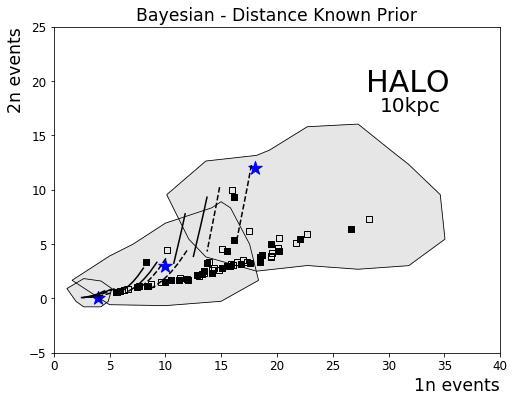

In [284]:
# Figure for HALO 1, 10kpc, 18v12 10vs3 4v0
figBdk2,axBdk2 = plt.subplots(1,1,figsize=figsize)

contours(xBdk2_1,yBdk2_1,zBdk2_1,cutBdk2_1,axBdk2)
contours(xBdk2_2,yBdk2_2,zBdk2_2,cutBdk2_2,axBdk2)
contours(xBdk2_3,yBdk2_3,zBdk2_3,cutBdk2_3,axBdk2)

other_sn_models(axBdk2,1,10,False)
snowglobes_curves(axBdk2,1,10,False)

# Truth values
Truth = [[18,10,4],[12,3,0]]
axBdk2.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axBdk2.set_title('Bayesian - Distance Known Prior')
axBdk2.text(0.7,0.8,'HALO',fontsize=exp_size,transform=axBdk2.transAxes)
axBdk2.text(0.73,0.74,'10kpc',fontsize=dist_size,transform=axBdk2.transAxes)


axBdk2.set_xlim(0,40)
axBdk2.set_ylim(-5,25)

pylab.savefig('./figures/bayesian_distKnown_unfolding_halo1_10kpc.png')

plt.show()

##### HALO2, 10kpc

In [285]:
# Data for HALO 2, 10kpc, 227v151 127vs38 51v0
h2_10kpc_227v151_1n, h2_10kpc_227v151_2n = np.load(unfolded_location+'halo2_10kpc_227v151_unfolded_bayesian_distKnown.npy')
h2_10kpc_127v38_1n,  h2_10kpc_127v38_2n  = np.load(unfolded_location+'halo2_10kpc_127v38_unfolded_bayesian_distKnown.npy')
h2_10kpc_51v0_1n,    h2_10kpc_51v0_2n    = np.load(unfolded_location+'halo2_10kpc_51v0_unfolded_bayesian_distKnown.npy')

In [286]:
# HALO 2, 10kpc, 227v151
xmin = -50; xmax = 500; ymin = 0; ymax = 330
xres = 50j; yres = 50j
xBdk3_1,yBdk3_1,zBdk3_1,cutBdk3_1 = density_cut(h2_10kpc_227v151_1n,h2_10kpc_227v151_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBdk3_1,yBdk3_1,zBdk3_1,cutBdk3_1,ax)
#scatter(h2_10kpc_227v151_1n,h2_10kpc_227v151_2n,ax)

In [287]:
# HALO 2, 10kpc, 127vs38
xmin = -50; xmax = 300; ymin = -20; ymax = 150
xres = 50j; yres = 40j
xBdk3_2,yBdk3_2,zBdk3_2,cutBdk3_2 = density_cut(h2_10kpc_127v38_1n,h2_10kpc_127v38_2n,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBdk3_2,yBdk3_2,zBdk3_2,cutBdk3_2,ax)
#scatter(h2_10kpc_127v38_1n,h2_10kpc_127v38_2n,ax)

In [288]:
# HALO 2, 10kpc, 51vs0
xmin = 0; xmax = 130; ymin = -20; ymax = 40
xres = 16j; yres = 14j
oneN_,twoN_ = zero_fix(h2_10kpc_51v0_1n,h2_10kpc_51v0_2n)
twoN_ = [i+1 for i in twoN_]
xBdk3_3,yBdk3_3,zBdk3_3,cutBdk3_3 = density_cut(oneN_,twoN_,xmin,xmax,ymin,ymax,xres,yres)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xBdk3_3,yBdk3_3,zBdk3_3,cutBdk3_3,ax)
#scatter(h2_10kpc_51v0_1n,h2_10kpc_51v0_2n,ax)

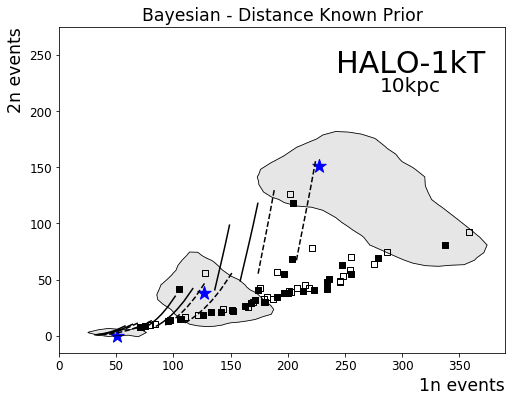

In [295]:
# Figure for HALO 2, 10kpc, 227v151 127vs38 51v0
figBdk3,axBdk3 = plt.subplots(1,1,figsize=figsize)

contours(xBdk3_1,yBdk3_1,zBdk3_1,cutBdk3_1,axBdk3)
contours(xBdk3_2,yBdk3_2,zBdk3_2,cutBdk3_2,axBdk3)
contours(xBdk3_3,yBdk3_3,zBdk3_3,cutBdk3_3,axBdk3)

other_sn_models(axBdk3,2,10,False)
snowglobes_curves(axBdk3,2,10,False)

# Truth values
Truth = [[227,127,51],[151,38,0]]
axBdk3.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axBdk3.set_title('Bayesian - Distance Known Prior')
axBdk3.text(0.62,0.86,'HALO-1kT',fontsize=exp_size,transform=axBdk3.transAxes)
axBdk3.text(0.72,0.80,'10kpc',fontsize=dist_size,transform=axBdk3.transAxes)


axBdk3.set_xlim(0,390)
axBdk3.set_ylim(-15,275)

pylab.savefig('./figures/bayesian_distKnown_unfolding_halo2_10kpc.png')

plt.show()

## Neural Network

Note that these have cut=0 for the density_cut function, because with the neural network I integrated to 90% probability

##### HALO1, 5kpc

In [68]:
# Data for HALO 1, 5kpc, 72v48 40vs12 16v0
h1_5kpc_72v48_1n, h1_5kpc_72v48_2n = np.load(unfolded_location+'halo1_5kpc_72v48_unfolded_NN.npy')
h1_5kpc_40v12_1n, h1_5kpc_40v12_2n = np.load(unfolded_location+'halo1_5kpc_40v12_unfolded_NN.npy')
h1_5kpc_16v0_1n,  h1_5kpc_16v0_2n  = np.load(unfolded_location+'halo1_5kpc_16v0_unfolded_NN.npy')

In [73]:
# HALO 1, 5kpc, 72v48
xmin = -15; xmax = 100; ymin = -15; ymax = 70
xres = 50j; yres = 50j
xN1_1,yN1_1,zN1_1,cutN1_1 = density_cut(h1_5kpc_72v48_1n,h1_5kpc_72v48_2n,xmin,xmax,ymin,ymax,xres,yres,cut=0)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xN1_1,yN1_1,zN1_1,cutN1_1,ax)
#scatter(h1_5kpc_72v48_1n,h1_5kpc_72v48_2n,ax)

In [72]:
# HALO 1, 5kpc, 40vs12
xmin = -15; xmax = 100; ymin = -15; ymax = 70
xres = 50j; yres = 50j
xN1_2,yN1_2,zN1_2,cutN1_2 = density_cut(h1_5kpc_40v12_1n,h1_5kpc_40v12_2n,xmin,xmax,ymin,ymax,xres,yres,cut=0)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xN1_2,yN1_2,zN1_2,cutN1_2,ax)
#scatter(h1_5kpc_40v12_1n,h1_5kpc_40v12_2n,ax)

In [75]:
# HALO 1, 5kpc, 16vs0
xmin = -15; xmax = 100; ymin = -15; ymax = 70
xres = 50j; yres = 50j
h1_5kpc_16v0_2n[1] = 1; h1_5kpc_16v0_2n[3] = 1
xN1_3,yN1_3,zN1_3,cutN1_3 = density_cut(h1_5kpc_16v0_1n,h1_5kpc_16v0_2n,xmin,xmax,ymin,ymax,xres,yres,cut=0)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xN1_3,yN1_3,zN1_3,cutN1_3,ax)
#scatter(h1_5kpc_16v0_1n,h1_5kpc_16v0_2n,ax)

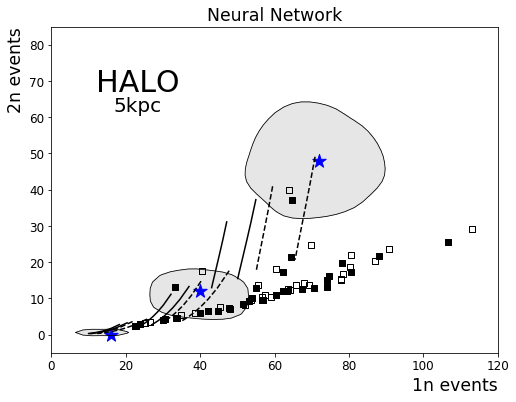

In [76]:
# Figure for HALO 1, 5kpc, 72v48 40vs12 16v0
figN1,axN1 = plt.subplots(1,1,figsize=figsize)

contours(xN1_1,yN1_1,zN1_1,cutN1_1,axN1)
contours(xN1_2,yN1_2,zN1_2,cutN1_2,axN1)
contours(xN1_3,yN1_3,zN1_3,cutN1_3,axN1)

other_sn_models(axN1,1,5,False)
snowglobes_curves(axN1,1,5,False)

# Truth values
Truth = [[72,40,16],[48,12,0]]
axN1.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axN1.set_title('Neural Network')
axN1.text(0.1,0.8,'HALO',fontsize=exp_size,transform=axN1.transAxes)
axN1.text(0.14,0.74,'5kpc',fontsize=dist_size,transform=axN1.transAxes)


axN1.set_xlim(0,120)
axN1.set_ylim(-5,85)

pylab.savefig('./figures/NN_unfolding_halo1_5kpc.png')

plt.show()

##### HALO1, 10kpc

In [201]:
# Data for HALO 1, 10kpc, 18v12 10vs3 4v0
h1_10kpc_18v12_1n, h1_10kpc_18v12_2n = np.load(unfolded_location+'halo1_10kpc_18v12_unfolded_NN.npy')
h1_10kpc_10v3_1n,  h1_10kpc_10v3_2n  = np.load(unfolded_location+'halo1_10kpc_10v3_unfolded_NN.npy')
h1_10kpc_4v0_1n,   h1_10kpc_4v0_2n   = np.load(unfolded_location+'halo1_10kpc_4v0_unfolded_NN.npy')

In [202]:
# HALO 1, 10kpc, 18v12
xmin = 0; xmax = 40; ymin = -15; ymax = 30
xres = 50j; yres = 50j
# note I set cut to 0.02 to cut out that one outlier
xN2_1,yN2_1,zN2_1,cutN2_1 = density_cut(h1_10kpc_18v12_1n,h1_10kpc_18v12_2n,xmin,xmax,ymin,ymax,xres,yres,cut=0.02)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xN2_1,yN2_1,zN2_1,cutN2_1,ax)
#scatter(h1_10kpc_18v12_1n,h1_10kpc_18v12_2n,ax)

In [203]:
# HALO 1, 10kpc, 10vs3
xmin = 0; xmax = 40; ymin = -15; ymax = 30
xres = 50j; yres = 50j
xN2_2,yN2_2,zN2_2,cutN2_2 = density_cut(h1_10kpc_10v3_1n,h1_10kpc_10v3_2n,xmin,xmax,ymin,ymax,xres,yres,cut=0)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xN2_2,yN2_2,zN2_2,cutN2_2,ax)
#scatter(h1_10kpc_10v3_1n,h1_10kpc_10v3_2n,ax)

In [204]:
# HALO 1, 10kpc, 4vs0
xmin = 0; xmax = 40; ymin = -15; ymax = 30
xres = 50j; yres = 50j
h1_10kpc_4v0_2n[1] = 1; h1_10kpc_4v0_2n[3] = 1
xN2_3,yN2_3,zN2_3,cutN2_3 = density_cut(h1_10kpc_4v0_1n,h1_10kpc_4v0_2n,xmin,xmax,ymin,ymax,xres,yres,cut=0)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xN2_3,yN2_3,zN2_3,cutN2_3,ax)
#scatter(h1_10kpc_4v0_1n,h1_10kpc_4v0_2n,ax)

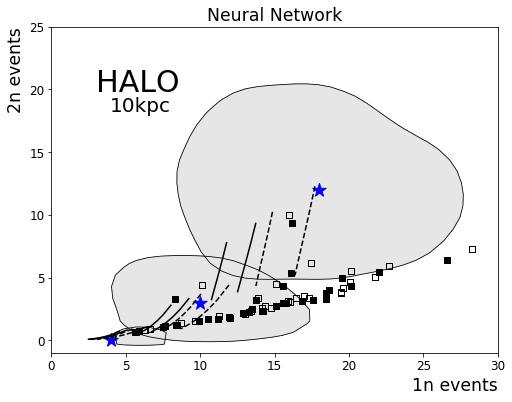

In [205]:
# Figure for HALO 1, 10kpc, 18v12 10vs3 4v0
figN2,axN2 = plt.subplots(1,1,figsize=figsize)

contours(xN2_1,yN2_1,zN2_1,cutN2_1,axN2)
contours(xN2_2,yN2_2,zN2_2,cutN2_2,axN2)
contours(xN2_3,yN2_3,zN2_3,cutN2_3,axN2)

other_sn_models(axN2,1,10,False)
snowglobes_curves(axN2,1,10,False)

# Truth values
Truth = [[18,10,4],[12,3,0]]
axN2.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axN2.set_title('Neural Network')
axN2.text(0.1,0.8,'HALO',fontsize=exp_size,transform=axN2.transAxes)
axN2.text(0.13,0.74,'10kpc',fontsize=dist_size,transform=axN2.transAxes)


axN2.set_xlim(0,30)
axN2.set_ylim(-1,25)

pylab.savefig('./figures/NN_unfolding_halo1_10kpc.png')

plt.show()

##### HALO2, 10kpc

In [206]:
# Data for HALO 2, 10kpc, 227v151 127vs38 51v0
h2_10kpc_227v151_1n, h2_10kpc_227v151_2n = np.load(unfolded_location+'halo2_10kpc_227v151_unfolded_NN.npy')
h2_10kpc_127v38_1n,  h2_10kpc_127v38_2n  = np.load(unfolded_location+'halo2_10kpc_127v38_unfolded_NN.npy')
h2_10kpc_51v0_1n,    h2_10kpc_51v0_2n    = np.load(unfolded_location+'halo2_10kpc_51v0_unfolded_NN.npy')

In [207]:
# HALO 2, 10kpc, 227v151
xmin = 150; xmax = 350; ymin = 100; ymax = 200
xres = 50j; yres = 50j
# Here I set cut = 0.05 to balance getting all the points and the extra dead space
xN3_1,yN3_1,zN3_1,cutN3_1 = density_cut(h2_10kpc_227v151_1n,h2_10kpc_227v151_2n,xmin,xmax,ymin,ymax,xres,yres,cut=0.05)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xN3_1,yN3_1,zN3_1,cutN3_1,ax)
#scatter(h2_10kpc_227v151_1n,h2_10kpc_227v151_2n,ax)

In [208]:
# HALO 2, 10kpc, 127vs38
xmin = 50; xmax = 200; ymin = 0; ymax = 80
xres = 50j; yres = 40j
xN3_2,yN3_2,zN3_2,cutN3_2 = density_cut(h2_10kpc_127v38_1n,h2_10kpc_127v38_2n,xmin,xmax,ymin,ymax,xres,yres,cut=0)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xN3_2,yN3_2,zN3_2,cutN3_2,ax)
#scatter(h2_10kpc_127v38_1n,h2_10kpc_127v38_2n,ax)

In [209]:
# HALO 2, 10kpc, 51vs0
xmin = 25; xmax = 75; ymin = -20; ymax = 20
xres = 30j; yres = 30j

# make sure variance isnt zero
h2_10kpc_51v0_2n[1] = 1

# Do this to make sure the end is inside the contour
h2_10kpc_51v0_1n = np.append(h2_10kpc_51v0_1n,h2_10kpc_51v0_1n[-1]+1)
h2_10kpc_51v0_2n = np.append(h2_10kpc_51v0_2n,(1))

xN3_3,yN3_3,zN3_3,cutN3_3 = density_cut(h2_10kpc_51v0_1n,h2_10kpc_51v0_2n,xmin,xmax,ymin,ymax,xres,yres,cut=0)
#fig,ax = plt.subplots(1,1,figsize=figsize)
#contours(xN3_3,yN3_3,zN3_3,cutN3_3,ax)
#scatter(h2_10kpc_51v0_1n,h2_10kpc_51v0_2n,ax)
#Truth = [[227,127,51],[151,38,0]]
#ax.scatter(Truth[0][2],Truth[1][2],color='b',marker='*',s=truth_size)

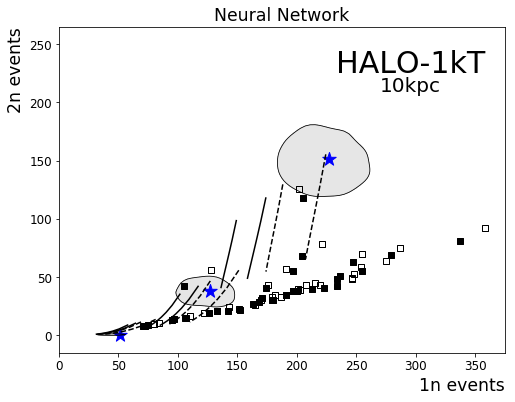

In [210]:
# Figure for HALO 2, 10kpc, 227v151 127vs38 51v0
figN3,axN3 = plt.subplots(1,1,figsize=figsize)

contours(xN3_1,yN3_1,zN3_1,cutN3_1,axN3)
contours(xN3_2,yN3_2,zN3_2,cutN3_2,axN3)
contours(xN3_3,yN3_3,zN3_3,cutN3_3,axN3)

other_sn_models(axN3,2,10,False)
snowglobes_curves(axN3,2,10,False)

# Truth values
Truth = [[227,127,51],[151,38,0]]
axN3.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axN3.set_title('Neural Network')
axN3.text(0.62,0.86,'HALO-1kT',fontsize=exp_size,transform=axN3.transAxes)
axN3.text(0.72,0.80,'10kpc',fontsize=dist_size,transform=axN3.transAxes)


axN3.set_xlim(0,375)
axN3.set_ylim(-15,265)

pylab.savefig('./figures/NN_unfolding_halo2_10kpc.png')

plt.show()